In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error  
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
import seaborn as sns

data = pd.read_csv("../_data/10_features_jarvis.csv", sep=',',header=0)
data = data.drop(['gap opt'], axis=1)

In [63]:
data['is_metal'] = 0

# Setting the values of the 'is_metal' column based on the band gap values
data.loc[data['band_gap'] > 0, 'is_metal'] = 0 # non-metal
data.loc[data['band_gap'] <= 0, 'is_metal'] = 1 # metal

In [64]:
data = data.drop(['is_metal'], axis=1)

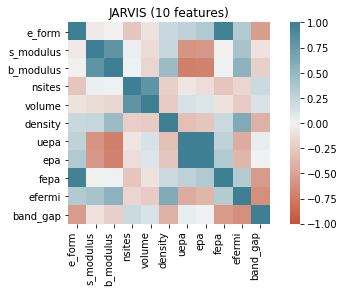

In [65]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

plt.tight_layout()
plt.title("JARVIS (10 features)")
plt.savefig('../plots/jarvis_plots/corr_10_features.pdf')